# Spain Electricity Shortfall

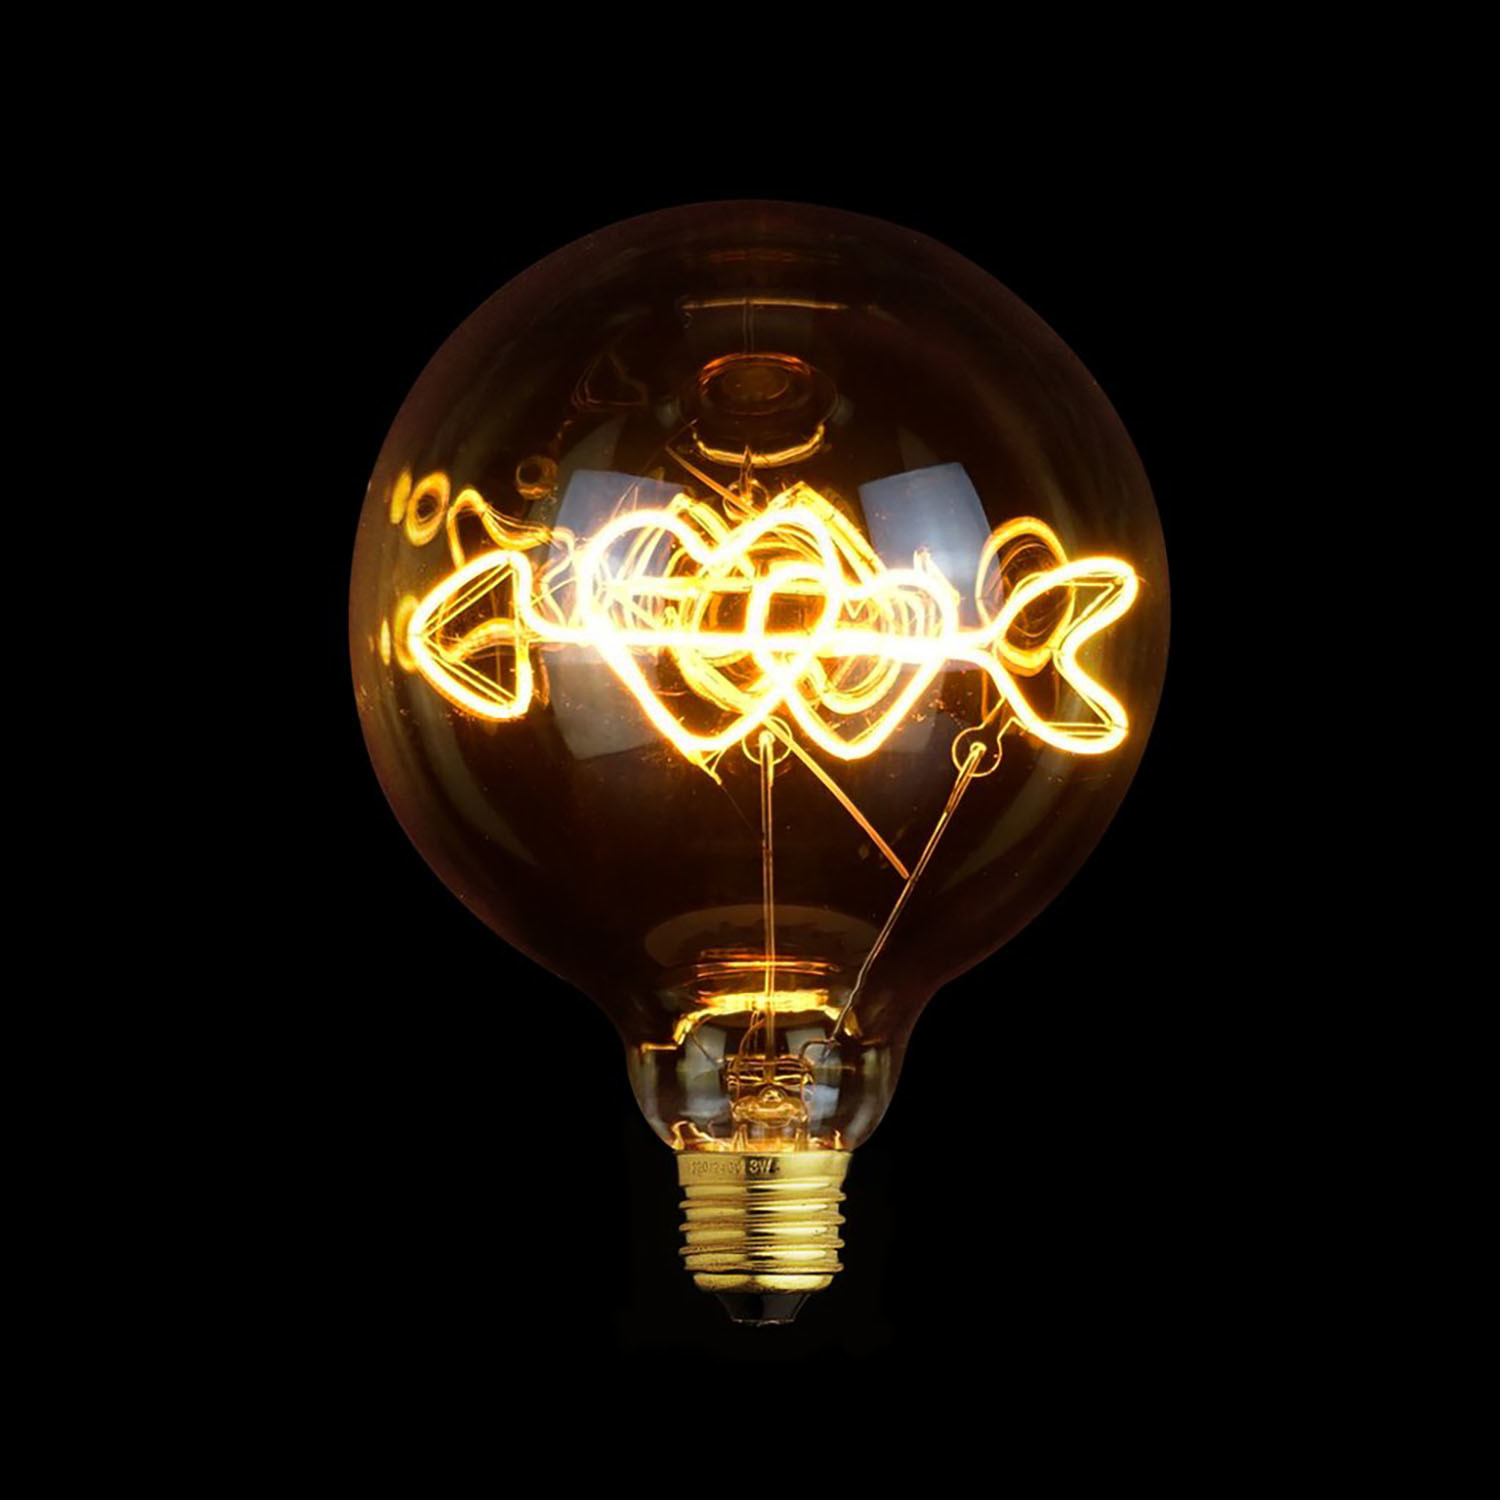

# 1. Importing Packages

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr


# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR



from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


import warnings

warnings.filterwarnings("ignore")


import pickle
# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

# 2. Loading the Data

In [3]:
df_train = pd.read_csv('df_train.csv') # load the train data
df_test = pd.read_csv('df_test.csv')  # load the test data

#to have a copy of our dataframes to be able to save our pickle file
df_test_copy = df_test.copy()
df_train_copy =df_train.copy()

In [4]:
#overview dataset
df_train.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

# 3. Exploratory Data Analysis (EDA)

Looking at our data, we observe that because of the shape of the data, it is not possbile to view ALL 49 columns thus, we cannot determine the hidden features. Therefore, we will use the transpose method (.T)

In [5]:
#using the transpose method, let us view our data again
df_train.head(10).T 

0                    1  \
Unnamed: 0                              0                    1   
time                  2015-01-01 03:00:00  2015-01-01 06:00:00   
Madrid_wind_speed                0.666667             0.333333   
Valencia_wind_deg                 level_5             level_10   
Bilbao_rain_1h                          0                    0   
Valencia_wind_speed              0.666667              1.66667   
Seville_humidity                  74.3333              78.3333   
Madrid_humidity                        64              64.6667   
Bilbao_clouds_all                       0                    0   
Bilbao_wind_speed                       1                    1   
Seville_clouds_all                      0                    0   
Bilbao_wind_deg                   223.333                  221   
Barcelona_wind_speed              6.33333                    4   
Barcelona_wind_deg                42.6667                  139   
Madrid_clouds_all                       0                    0   
Seville_wind_speed                3.33333              3.33333   
Barcelona_rain_1h                       0                    0   
Seville_pressure                     sp25                 sp25   
Seville_rain_1h                         0                    0   
Bilbao_snow_3h                          0                    0   
Barcelona_pressure                1036.33              1037.33   
Seville_rain_3h                         0                    0   
Madrid_rain_1h                          0                    0   
Barcelona_rain_3h                       0                    0   
Valencia_snow_3h                        0                    0   
Madrid_weather_id                     800                  800   
Barcelona_weather_id                  800                  800   
Bilbao_pressure                      1035              1035.67   
Seville_weather_id                    800                  800   
Valencia_pressure                 1002.67              1004.33   
Seville_temp_max                  274.255              274.945   
Madrid_pressure                   971.333              972.667   
Valencia_temp_max                 269.888              271.728   
Valencia_temp                     269.888              271.728   
Bilbao_weather_id                     800                  800   
Seville_temp                      274.255              274.945   
Valencia_humidity                 75.6667                   71   
Valencia_temp_min                 269.888              271.728   
Barcelona_temp_max                281.013              280.562   
Madrid_temp_max                   265.938              266.387   
Barcelona_temp                    281.013              280.562   
Bilbao_temp_min                   269.339              270.376   
Bilbao_temp                       269.339              270.376   
Barcelona_temp_min                281.013              280.562   
Bilbao_temp_max                   269.339              270.376   
Seville_temp_min                  274.255              274.945   
Madrid_temp                       265.938              266.387   
Madrid_temp_min                   265.938              266.387   
load_shortfall_3h                 6715.67              4171.67   

                                        2                    3  \
Unnamed: 0                              2                    3   
time                  2015-01-01 09:00:00  2015-01-01 12:00:00   
Madrid_wind_speed                       1                    1   
Valencia_wind_deg                 level_9              level_8   
Bilbao_rain_1h                          0                    0   
Valencia_wind_speed                     1                    1   
Seville_humidity                  71.3333              65.3333   
Madrid_humidity                   64.3333              56.3333   
Bilbao_clouds_all                       0                    0   
Bilbao_wind_speed                       1                    1   
Seville_cloud

In [6]:
#checking the shape of the data
df_train.shape

(8763, 49)

There are 49 columns and 8763 rows in our dataset.
We have an unnamed column (Unnamed:0) which has the same index value as seen above. This column is redundant and may have a negative impact on our training model.
Valencia_wind_deg and Seville_pressure columns display categorical values. However, we need only numerical values in training our model thus, we will convert the values in those two columns to numerical values.

In [7]:
#Let us view the data types of the values of each column of our data set
df_train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   object 
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

From the info above, our entire data set is composed of three different data types: object, float, and int

In [8]:
df_train.isnull().sum() #checking for possible missing values

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2068
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

It can be deduced that Valencia_pressure has missing values.
We will fill up these missing values appropriately in the feature engineering section of this notebook.

In [9]:
# Let us take a look at the descriptive statistics of our data set in the transposed format
df_train.describe().T

count          mean           std          min  \
Unnamed: 0            8763.0   4381.000000   2529.804538     0.000000   
Madrid_wind_speed     8763.0      2.425729      1.850371     0.000000   
Bilbao_rain_1h        8763.0      0.135753      0.374901     0.000000   
Valencia_wind_speed   8763.0      2.586272      2.411190     0.000000   
Seville_humidity      8763.0     62.658793     22.621226     8.333333   
Madrid_humidity       8763.0     57.414717     24.335396     6.333333   
Bilbao_clouds_all     8763.0     43.469132     32.551044     0.000000   
Bilbao_wind_speed     8763.0      1.850356      1.695888     0.000000   
Seville_clouds_all    8763.0     13.714748     24.272482     0.000000   
Bilbao_wind_deg       8763.0    158.957511    102.056299     0.000000   
Barcelona_wind_speed  8763.0      2.870497      1.792197     0.000000   
Barcelona_wind_deg    8763.0    190.544848     89.077337     0.000000   
Madrid_clouds_all     8763.0     19.473392     28.053660     0.000000   
Seville_wind_speed    8763.0      2.425045      1.672895     0.000000   
Barcelona_rain_1h     8763.0      0.128906      0.634730     0.000000   
Seville_rain_1h       8763.0      0.039439      0.175857     0.000000   
Bilbao_snow_3h        8763.0      0.031912      0.557264     0.000000   
Barcelona_pressure    8763.0   1377.964605  14073.140990   670.666667   
Seville_rain_3h       8763.0      0.000243      0.003660     0.000000   
Madrid_rain_1h        8763.0      0.037818      0.152639     0.000000   
Barcelona_rain_3h     8763.0      0.000439      0.003994     0.000000   
Valencia_snow_3h      8763.0      0.000205      0.011866     0.000000   
Madrid_weather_id     8763.0    773.527594     77.313315   211.000000   
Barcelona_weather_id  8763.0    765.979687     88.142235   200.666667   
Bilbao_pressure       8763.0   1017.739549     10.046124   971.333333   
Seville_weather_id    8763.0    774.658818     71.940009   200.000000   
Valencia_pressure     6695.0   1012.051407      9.506214   972.666667   
Seville_temp_max      8763.0    297.479527      8.875812   272.063000   
Madrid_pressure       8763.0   1010.316920     22.198555   927.666667   
Valencia_temp_max     8763.0    291.337233      7.565692   269.888000   
Valencia_temp         8763.0    290.592152      7.162274   269.888000   
Bilbao_weather_id     8763.0    724.722362    115.846537   207.333333   
Seville_temp          8763.0    293.978903      7.920986   272.063000   
Valencia_humidity     8763.0     65.247727     19.262322    10.333333   
Valencia_temp_min     8763.0    289.867648      6.907402   269.888000   
Barcelona_temp_max    8763.0    291.157644      7.273538   272.150000   
Madrid_temp_max       8763.0    289.540309      9.752047   264.983333   
Barcelona_temp        8763.0    289.855459      6.528111   270.816667   
Bilbao_temp_min       8763.0    285.017973      6.705672   264.483333   
Bilbao_temp           8763.0    286.422929      6.818682   267.483333   
Barcelona_temp_min    8763.0    288.447422      6.102593   269.483333   
Bilbao_temp_max       8763.0    287.966027      7.105590   269.063000   
Seville_temp_min      8763.0    291.633356      8.178220   270.150000   
Madrid_temp           8763.0    288.419439      9.346796   264.983333   
Madrid_temp_min       8763.0    287.202203      9.206237   264.983333   
load_shortfall_3h     8763.0  10673.857612   5218.046404 -6618.000000   

                              25%           50%           75%           max  
Unnamed: 0            2190.500000   4381.000000   6571.500000  8.762000e+03  
Madrid_wind_speed        1.000000      2.000000      3.333333  1.300000e+01  
Bilbao_rain_1h           0.000000      0.000000      0.100000  3.000000e+00  
Valencia_wind_speed      1.000000      1.666667      3.666667  5.200000e+01  
Seville_humidity        44.333333     65.666667     82.000000  1.000000e+02  
Madrid_humidity         36.333333     58.000000     78.666667  1.000000e+02  
Bilbao_clouds_all       10.000000     45.0000

From the mean of some of the values above, there is a possibility of outliers present in our dataset.

In [10]:
#Checking for possible outliers
#High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers
df_train.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10.710308
Valencia_pressure          2.211823
Seville_temp_max          -0

In [11]:
#Let us view our target variable Load_shortfall_3h against time on a line chart
fig = px.line(df_train, y = df_train['load_shortfall_3h'], x =df_train['time'], width =900, height=400 )
fig.show()

We can tell from the image the seasonality in the time axis on their load_shortfall_3h values, We will need to desample (break them into bits) this image to get a better understanding of the graph

To do this we will have to desample the time into:

Year,
Months,
Weeks,
Days,
Hours

<AxesSubplot:xlabel='time'>

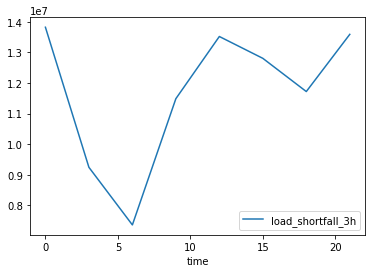

In [12]:
df_train.groupby([df_train['time'].astype('datetime64').dt.hour])['load_shortfall_3h'].sum().plot(legend = True)

In [13]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.year])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by Year',
        y='load_shortfall_3h',width =800, height=400 )

The yearly Load_short_fall plots indicates an increase in load short fall from 2016 down to 2017 surpassing the previous years

In [14]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.month])['load_shortfall_3h'].mean(),
        title = 'Load_shortfall_3h grouped by Month of Year',
        y='load_shortfall_3h', width =800, height=400)

Also the plot above, indicates a higher 'load short fall' from middle of June down to December

In [15]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.weekofyear])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Week of the Year', y='load_shortfall_3h', width =700, height=400)

No much information can be deduced from the the week of the year Load_short_fall as shown above

In [16]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.dayofyear])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Day of the Year', y='load_shortfall_3h', width =700, height=400)

The minimum load_short_fall_3h recorded is 1,862k while the maximum is 17,306k as seen from the Day of the year plots

In [17]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.day])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Day of the Month', y='load_shortfall_3h', width =800, height=400 )

The plots above shows 10k to 12k consistent recorded values from middle of each to the end of the month

In [18]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.dayofweek])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Day of the Week', y='load_shortfall_3h', width =800, height=400 )

There seems to be a decrease in the Load_short_fall_3h Day of the week plots on Fridays and Saturdays, we can not account for the reasons

In [19]:
px.line(df_train.groupby([df_train['time'].astype('datetime64').dt.hour])['load_shortfall_3h'].mean(), 
        title = 'Load_shortfall_3h grouped by Hour of Day', y='load_shortfall_3h', width =800, height=400 )

There seems to be an increase in the Load_short_fall_3h hourly plots each day, mostly from 10hours and above

(array([7.000e+01, 3.720e+02, 8.370e+02, 1.641e+03, 2.494e+03, 2.301e+03,
        9.000e+02, 1.400e+02, 7.000e+00, 1.000e+00]),
 array([-6618. , -2765.8,  1086.4,  4938.6,  8790.8, 12643. , 16495.2,
        20347.4, 24199.6, 28051.8, 31904. ]),
 <BarContainer object of 10 artists>)

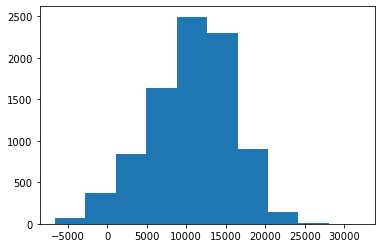

In [20]:
# Let us check the Distribution of our Data
plt.hist(df_train['load_shortfall_3h'])

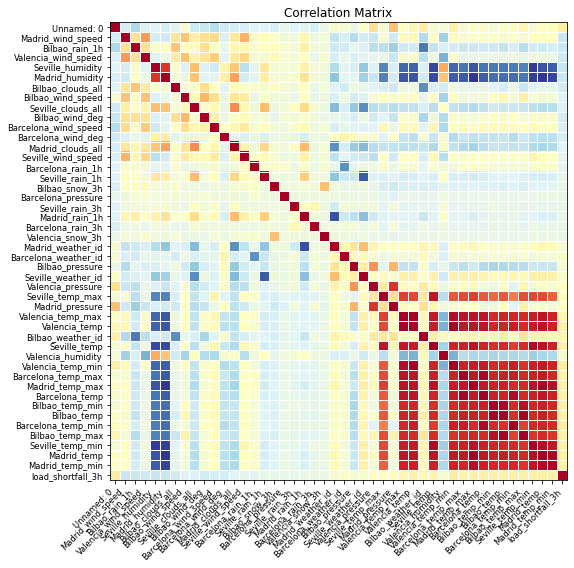

In [21]:
# # Let's have a look at the correlation between the numeric variables.
fig = plt.figure(figsize=(10,8));
ax = fig.add_subplot(111);
plot_corr(df_train.corr(), xnames = df_train.corr().columns, ax = ax, );

First, we can easily tell the presence of high correlation (in red) between features on the heatmap at the bottom right corner of our graph.
A breakdown of handling such occurence will be discussed in the feature engineering section of this notebook.
It is important to perform this step when choosing the best features which in turn would result to an improvement of our model.

# 4. Data Engineering

We will be carrying out Feature Engineering in this section of our notebook to improve the performance of the model.

As we saw in the previous section (EDA), we highlighted some columns to be dropped as well as columns with categorical values.

We will now do the following:

Drop the Unnamed Column.
Convert both Seville_pressure and Valencia_wind_degree columns from categorical to numerical values.
Also, we will be converting our Time column values to date/time format as follows;
Year.
Month of the Year.
Week of the Year.
Day of the Year.
Day of the Month.
Day of the Week.
Hour of the Week.
Hour of the Day.
This will enable us have a better and larger expression of our data during modeling

In [22]:
print(df_train['Valencia_pressure'].mean())

1012.0514065222828


In [23]:
#Filling in the missing values with the mean
df_train['Valencia_pressure'].fillna(df_train['Valencia_pressure'].mean(), inplace = True)

In [24]:
#converting Valencia_wind_deg and Seville_pressure columns from categorical to numerical datatypes.

df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].str.extract('(\d+)').astype('int64')
df_train['Seville_pressure'] = df_train['Seville_pressure'].str.extract('(\d+)').astype('int64')

The next step is to engineer new features from the time column

In [25]:
#Engineering New Features ( i.e Desampling the Time) to further expand our training data set

df_train['Year']  = df_train['time'].astype('datetime64').dt.year
df_train['Month_of_year']  = df_train['time'].astype('datetime64').dt.month
df_train['Week_of_year'] = df_train['time'].astype('datetime64').dt.weekofyear
df_train['Day_of_year']  = df_train['time'].astype('datetime64').dt.dayofyear
df_train['Day_of_month']  = df_train['time'].astype('datetime64').dt.day
df_train['Day_of_week'] = df_train['time'].astype('datetime64').dt.dayofweek
df_train['Hour_of_week'] = ((df_train['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df_train['time'].astype('datetime64').dt.hour)
df_train['Hour_of_day']  = df_train['time'].astype('datetime64').dt.hour

Let us have a look at the correlation(s) between our newly created temporal features

<AxesSubplot:>

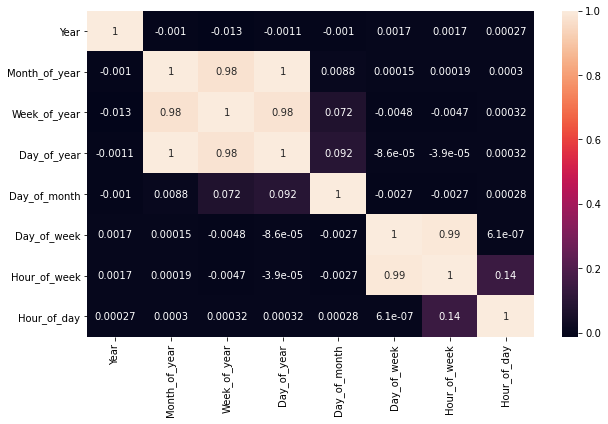

In [26]:
Time_df = df_train.iloc[:,[-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[10,6])
sns.heatmap(Time_df.corr(),annot=True )

Looking at our heatmap tells us that we have high Multicollinearity present in our new features. The features involved are -

Week of the year.
Day of the year.
Month of the year.
Day of the week.
Hour of the week.
We would have to drop one of the features that have high correlation with each other.

Alongside dropping these features mentioned above, we would also be dropping the time and Unnamed column.

In [27]:
df_train = df_train.drop(columns=['Week_of_year','Day_of_year','Hour_of_week', 'Unnamed: 0','time'])

<AxesSubplot:>

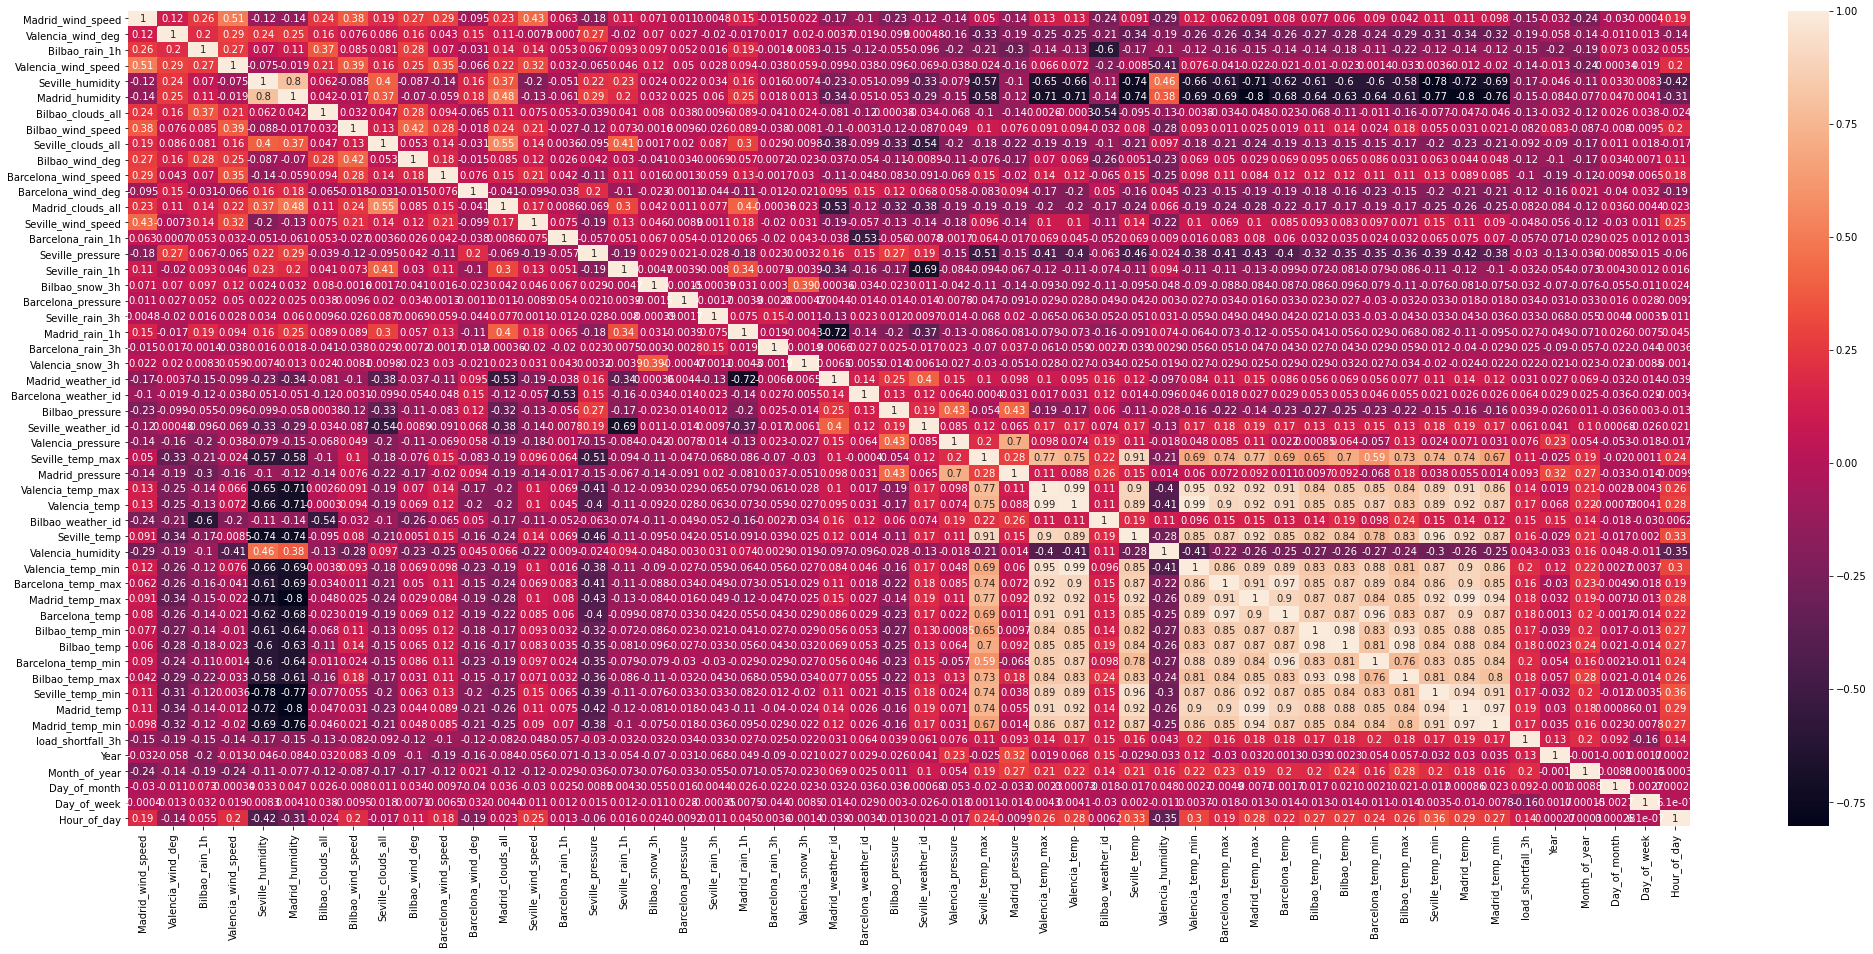

In [28]:
plt.figure(figsize=[35,15])
sns.heatmap(df_train.corr(),annot=True )

Just as we mentioned in our EDA, we noticed the presence of high correlations between the predictor columns and also possible outliers.

Here, we would have to drop these columns to improve the performance of our model and reduce any possibility of overfitting in our model.
Let us check if this approach corresponds with our feature selection.
Using SelectKBest and Chi2 to perform Feature Selection.

In [29]:
## Splitting our data into dependent Variable and Independent Variable
X = df_train.drop(columns = 'load_shortfall_3h')
y = df_train['load_shortfall_3h'].astype('int')

In [30]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
new_X = featureScores.sort_values('Score',ascending=False).head(40)
new_X.head(40) #To get the most important features based on their score 

Features         Score
18    Barcelona_pressure  1.189344e+09
9        Bilbao_wind_deg  4.574064e+05
8     Seville_clouds_all  3.049398e+05
11    Barcelona_wind_deg  2.920143e+05
12     Madrid_clouds_all  2.862344e+05
6      Bilbao_clouds_all  1.705834e+05
32     Bilbao_weather_id  1.307308e+05
24  Barcelona_weather_id  7.121392e+04
5        Madrid_humidity  7.087652e+04
17        Bilbao_snow_3h  6.812971e+04
4       Seville_humidity  5.699050e+04
23     Madrid_weather_id  5.445955e+04
26    Seville_weather_id  4.703123e+04
34     Valencia_humidity  3.980066e+04
48          Day_of_month  3.443358e+04
50           Hour_of_day  3.167767e+04
15      Seville_pressure  2.687804e+04
14     Barcelona_rain_1h  2.171411e+04
3    Valencia_wind_speed  1.601889e+04
47         Month_of_year  1.293213e+04
1      Valencia_wind_deg  1.104442e+04
7      Bilbao_wind_speed  1.092892e+04
0      Madrid_wind_speed  1.017244e+04
49           Day_of_week  9.265478e+03
13    Seville_wind_speed  8.132635e+03
10  Barcelona_wind_speed  8.016649e+03
2         Bilbao_rain_1h  7.544582e+03
16       Seville_rain_1h  5.397681e+03
20        Madrid_rain_1h  4.226512e+03
29       Madrid_pressure  3.436256e+03
22      Valencia_snow_3h  3.110384e+03
37       Madrid_temp_max  2.281817e+03
44           Madrid_temp  2.106589e+03
45       Madrid_temp_min  2.054920e+03
28      Seville_temp_max  1.847097e+03
43      Seville_temp_min  1.589866e+03
33          Seville_temp  1.483057e+03
30     Valencia_temp_max  1.365686e+03
36    Barcelona_temp_max  1.260724e+03
31         Valencia_temp  1.229799e+03

This result backups our claim, were we saw in the heatmap multicollinearity between features, and from our feature selection, we can see those features as having the lowest significance in our data.

Dropping Outliers
We have one more thing to do, which is to remove possible outliers. Also, we will select the important features for our model thus dropping others having multicollinearity

In [31]:
X = X[['Madrid_wind_speed', 'Valencia_wind_deg', 'Bilbao_rain_1h',
       'Valencia_wind_speed', 'Seville_humidity', 'Madrid_humidity',
       'Bilbao_clouds_all', 'Bilbao_wind_speed', 'Seville_clouds_all',
       'Bilbao_wind_deg', 'Barcelona_wind_speed', 'Barcelona_wind_deg',
       'Madrid_clouds_all', 'Seville_wind_speed', 'Barcelona_rain_1h',
       'Seville_pressure', 'Seville_rain_1h', 'Bilbao_snow_3h',
       'Barcelona_pressure', 'Seville_rain_3h', 'Madrid_rain_1h',
       'Barcelona_rain_3h', 'Madrid_weather_id',
       'Barcelona_weather_id', 'Bilbao_pressure', 'Seville_weather_id',
       'Valencia_pressure', 'Bilbao_weather_id', 
        'Valencia_humidity', 'Year', 'Month_of_year', 'Day_of_month', 'Day_of_week', 'Hour_of_day']]

<AxesSubplot:>

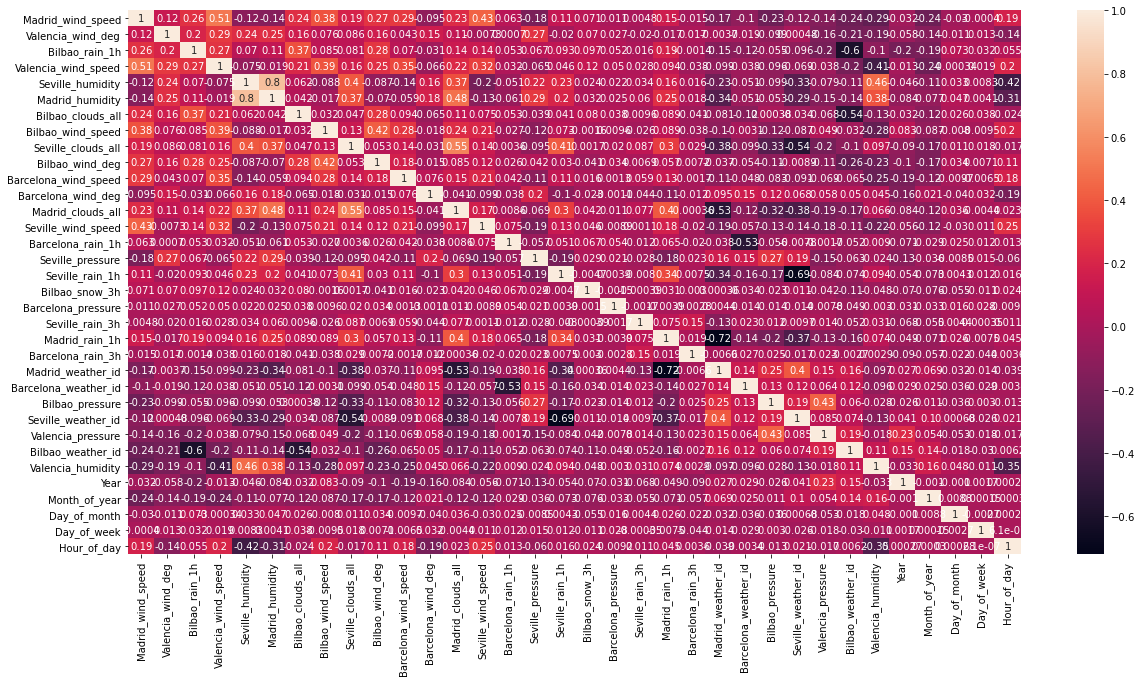

In [32]:
plt.figure(figsize=[20,10])
sns.heatmap(X.corr(),annot=True )

We have been able to remove the collinearity seen in previous heatmaps and also selected specific features to train our model with

Feature Scaling
Lastly, before we carry out modeling, it is important to scale our data. As we saw during the EDA, we noticed how some columns(features) had values that were out of range when we compared their mean, max and standard deviation. This can result to bias in the model during decision making, thus it is important to convert all the column values to a certain range/scale.

What is Feature Scaling?
Feature scaling is the process of normalising the range of features in a dataset. Real-world datasets often contain features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

In this project, we will be carrying out Standard Scaling, becasue of it's robustness to outliers

In [33]:
# Create standardization object
scaler = StandardScaler()

In [34]:
# Save standardized features into new variable

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.head()




Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.950708          -0.096053       -0.362123            -0.796169   
1          -1.130863           1.641580       -0.362123            -0.381412   
2          -0.770554           1.294054       -0.362123            -0.657917   
3          -0.770554           0.946527       -0.362123            -0.657917   
4          -0.770554           0.599000       -0.362123            -0.657917   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.516117         0.270621          -1.335491          -0.501451   
1          0.692953         0.298017          -1.335491          -0.501451   
2          0.383491         0.284319          -1.335491          -0.501451   
3          0.118238        -0.044439          -1.335491          -0.501451   
4         -0.161751        -0.017043          -1.274045          -0.894581   

   Seville_clouds_all  Bilbao_wind_deg  ...  Bilbao_pressure  \
0           -0.565065         0.630823  ...         1.718219   
1           -0.565065         0.607959  ...         1.784583   
2           -0.565065         0.542632  ...         1.817765   
3           -0.565065         0.398912  ...         1.817765   
4           -0.565065         0.255192  ...         1.751401   

   Seville_weather_id  Valencia_pressure  Bilbao_weather_id  \
0            0.352274      -1.129531e+00           0.649842   
1            0.352274      -9.289340e-01           0.649842   
2            0.352274      -8.085757e-01           0.649842   
3            0.352274      -3.672620e-01           0.649842   
4            0.352274       2.736630e-13           0.649842   

   Valencia_humidity      Year  Month_of_year  Day_of_month  Day_of_week  \
0           0.540928 -1.226179      -1.602429     -1.675368     -0.00274   
1           0.298645 -1.226179      -1.602429     -1.675368     -0.00274   
2           0.021750 -1.226179      -1.602429     -1.675368     -0.00274   
3          -0.583957 -1.226179      -1.602429     -1.675368     -0.00274   
4          -0.358980 -1.226179      -1.602429     -1.675368     -0.00274   

   Hour_of_day  
0    -1.090901  
1    -0.654451  
2    -0.218001  
3     0.218449  
4     0.654899  

[5 rows x 34 columns]

In [35]:
y.head()

0    6715
1    4171
2    4274
3    5075
4    6620
Name: load_shortfall_3h, dtype: int32

# 5. Modelling

Model Building
We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
Build a Linear Regression model which would serve as our base model using the train data.
Try and improve the linear model by employing Lasso and Ridge
Try out other models like decision trees, Random Forest and SVR

In [36]:
#Separating our models into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state = 42)

In [37]:
#checking the shape of the training and testing data

print('Training predictor:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing predictor:', X_test.shape)
print('Testing target:', y_test.shape)

Training predictor: (7010, 34)
Training target: (7010,)
Testing predictor: (1753, 34)
Testing target: (1753,)


# Multiple linear regression model

As our basline, we would first make use of Linear Model.
The term linear model implies that the model is specified as a linear combination of features. Based on training data, the learning process computes one weight for each feature to form a model that can predict or estimate the target value.



In [38]:
#Instantiate the model
lm = LinearRegression()
#Fit the model into training set
lm.fit(X_train, y_train)

#predict on unseen data
predict = lm.predict(X_test)
train_predict = lm.predict(X_train) #predicting on the same training set

# Lasso Regression (L1 Norm)

In [39]:
# Create LASSO model object, setting alpha to 0.01
""" when alpha is 0, Lasso regression produces the same coefficients as a linear regression. When alpha is very very large, all coefficients are zero."""
lasso = Lasso(alpha=0.01)
# Train the LASSO model
lasso.fit(X_train, y_train)
# Get predictions
lasso_pred = lasso.predict(X_test)

# Ridge Regression (L2 Norm)

In [40]:
# Creating Ridge model
Ridge = Ridge()
# Train the model
Ridge.fit(X_train, y_train)
# Get predictions
Ridge_pred = Ridge.predict(X_test)

# Support Vector Regressor

In [41]:
# Instantiate support vector regression model
Sv_reg = SVR(kernel='rbf', gamma='auto')
# Train the model
Sv_reg.fit(X_train,y_train)
# Get predictions
SV_pred = Sv_reg.predict(X_test)

# Decision Tree Model

In [42]:
# Instantiate regression tree model
Reg_tree = DecisionTreeRegressor(random_state=6)
# Fitting the model
Reg_tree.fit(X_train,y_train)
Tree_pred = Reg_tree.predict(X_test)

# Random Forest

In [43]:
# Our forest consists of 200 trees with a max depth of 8 
RF = RandomForestRegressor(n_estimators=200, max_depth=8)
# Fitting the model
RF.fit(X_train,y_train)
RF_predict = RF.predict(X_test)

In this section of our notebook, we will evaluate the performance of SIX MODELS we trained using metrics such as-

Root Mean Squared Error (RMSE), 
Mean Squared Error (MSE), 
Mean Absolute Error (MAE), 
Residual Sum of Squares Error (RSS)

In [44]:
#Comparing the True value and the Predicted Value of our models
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
Lass_ = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_pred})
Ridge_ = pd.DataFrame({'Actual': y_test, 'Predicted': Ridge_pred})
Sv_ = pd.DataFrame({'Actual': y_test, 'Predicted': SV_pred})
Des_ = pd.DataFrame({'Actual': y_test, 'Predicted': Tree_pred})
Rand_ = pd.DataFrame({'Actual': y_test, 'Predicted': RF_predict})

In [45]:
print(Linear.head()) #Linear Model 
print('\n')
print(Lass_.head()) # Lasso Model
print('\n')
print(Ridge_.head()) # Ridge Model
print('\n')
print(Sv_.head()) #SVR Model
print('\n')
print(Des_.head()) #Decision Tree Model
print('\n')
print(Rand_.head()) # Random Forest Model

      Actual     Predicted
1226   11450  12408.082166
7903   13693  12192.280096
1559   18337  12069.449711
3621   -1221   9420.766014
7552    8515  14081.831992


      Actual     Predicted
1226   11450  12408.040162
7903   13693  12192.285141
1559   18337  12069.426889
3621   -1221   9420.777827
7552    8515  14081.743368


      Actual     Predicted
1226   11450  12407.695156
7903   13693  12191.992218
1559   18337  12069.465054
3621   -1221   9420.780876
7552    8515  14081.276309


      Actual     Predicted
1226   11450  11114.379089
7903   13693  11104.075061
1559   18337  11221.728281
3621   -1221  11016.194928
7552    8515  11218.252090


      Actual  Predicted
1226   11450     8409.0
7903   13693    11016.0
1559   18337    18497.0
3621   -1221      -67.0
7552    8515     9642.0


      Actual     Predicted
1226   11450   7834.524756
7903   13693  16885.492729
1559   18337  14240.428104
3621   -1221   4669.454837
7552    8515  10841.203845


From the Predicted values above, we can see some models have values very close to the actual label, let us not get carried away as it doesn't tell the whole story.

Some of these results might be attributed to overfitting and also exposed to a lot of noise/outliers.

We will therefore test our model's performance based on the Metrics aforementioned in the previous cell.

# Comparing the Root Mean Square Error across Models

In [46]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : np.sqrt(metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

Test RMSE
Decision Tree  3899.568966
Lasso          4848.114436
Linear model   4848.113470
Random Forest  3346.519675
Ridge          4848.110776
SVR            5294.338527

In [47]:
px.bar(Model_Performance, y =Model_Performance['Test RMSE'],
       color = Model_Performance.index, width =700, height=400)

From the graph above, we can confirm that the Random Forest model performs better than others in terms of RMSE

# Comparing the Mean Square Error across Models


In [48]:
Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict)),
                        "Ridge": (metrics.mean_squared_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_squared_error(y_test,lasso_pred)),
                         "SVR" : (metrics.mean_squared_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

Test MSE
Decision Tree  1.520664e+07
Lasso          2.350421e+07
Linear model   2.350420e+07
Random Forest  1.119919e+07
Ridge          2.350418e+07
SVR            2.803002e+07

In [49]:
px.bar(Model_Performance2, y =Model_Performance2['Test MSE'],
       color = Model_Performance2.index, width =700, height=400)

From the graph above, we can confirm that the Random Forest model performs better than others in terms of MSE

# Comparing the Mean Absolute Error across Models

In [50]:
Model_Performance3= { 
    
                      'Test MAE':
                    
                        {"Linear model": (metrics.mean_absolute_error(y_test,predict)),
                        "Ridge": (metrics.mean_absolute_error(y_test,Ridge_pred)),
                        "Lasso" : (metrics.mean_absolute_error(y_test,lasso_pred)),
                         "SVR" : (metrics.mean_absolute_error(y_test,SV_pred)),
                        "Decision Tree" : (metrics.mean_absolute_error(y_test,Tree_pred)),
                        "Random Forest" : (metrics.mean_absolute_error(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance3 = pd.DataFrame(data=Model_Performance3)
Model_Performance3

Test MAE
Decision Tree  2812.318882
Lasso          3861.387922
Linear model   3861.385356
Random Forest  2649.199523
Ridge          3861.391165
SVR            4226.823332

In [51]:
px.bar(Model_Performance3, y =Model_Performance3['Test MAE'],
       color = Model_Performance3.index, width =700, height=400)

From the graph above, we can confirm that the Random Forest model performs better than others in terms of MSE

In [52]:
Model_Performance4= { 
    
                      'Test R^2':
                    
                        {"Linear model": (metrics.r2_score(y_test,predict)),
                        "Ridge": (metrics.r2_score(y_test,Ridge_pred)),
                        "Lasso" : (metrics.r2_score(y_test,lasso_pred)),
                         "SVR" : (metrics.r2_score(y_test,SV_pred)),
                        "Decision Tree" : (metrics.r2_score(y_test,Tree_pred)),
                        "Random Forest" : (metrics.r2_score(y_test,RF_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4

Test R^2
Decision Tree  0.460034
Lasso          0.165399
Linear model   0.165399
Random Forest  0.602332
Ridge          0.165400
SVR            0.004693

In [53]:
px.bar(Model_Performance4, y =Model_Performance4['Test R^2'],
       color = Model_Performance4.index, width =700, height=400)

# We have chosen Random Forest model as our most prefered model of choice.

In [54]:
#en_pred = v_reg.fit(X_train,y_train)
#RF.fit(X_train,y_train)
RF.fit(X_train,y_train)
print (RF, "\n")

RandomForestRegressor(max_depth=8, n_estimators=200) 



In [55]:
#saving the pickle file
RF_save_path = "RF.pkl"
with open(RF_save_path,'wb') as file:
    pickle.dump(RF,file)

In [56]:
#en_load_path = "v_reg.pkl"
RF_load_path = "RF.pkl"
with open(RF_load_path,'rb') as file:
    unpickled_RF = pickle.load(file)

In [57]:
RF_predict =  unpickled_RF.predict(X)

In [58]:
df_new = pd.DataFrame(RF_predict, columns=['load_shortfall_3h'])

In [59]:
df_test.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0        8763  2018-01-01 00:00:00           5.000000           level_8   
1        8764  2018-01-01 03:00:00           4.666667           level_8   
2        8765  2018-01-01 06:00:00           2.333333           level_7   
3        8766  2018-01-01 09:00:00           2.666667           level_7   
4        8767  2018-01-01 12:00:00           4.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             5.000000         87.000000        71.333333   
1             0.0             5.333333         89.000000        78.000000   
2             0.0             5.000000         89.000000        89.666667   
3             0.0             5.333333         93.333333        82.666667   
4             0.0             8.666667         65.333333        64.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Barcelona_temp_max  \
0          20.000000           3.000000  ...          287.816667   
1           0.000000           3.666667  ...          284.816667   
2           0.000000           2.333333  ...          284.483333   
3          26.666667           5.666667  ...          284.150000   
4          26.666667          10.666667  ...          287.483333   

   Madrid_temp_max  Barcelona_temp  Bilbao_temp_min  Bilbao_temp  \
0       280.816667      287.356667       276.150000   280.380000   
1       280.483333      284.190000       277.816667   281.010000   
2       276.483333      283.150000       276.816667   279.196667   
3       277.150000      283.190000       279.150000   281.740000   
4       281.150000      286.816667       281.816667   284.116667   

   Barcelona_temp_min  Bilbao_temp_max Seville_temp_min  Madrid_temp  \
0          286.816667       285.150000       283.150000   279.866667   
1          283.483333       284.150000       281.150000   279.193333   
2          281.816667       282.150000       280.483333   276.340000   
3          282.150000       284.483333       279.150000   275.953333   
4          286.150000       286.816667       284.483333   280.686667   

   Madrid_temp_min  
0       279.150000  
1       278.150000  
2       276.150000  
3       274.483333  
4       280.150000  

[5 rows x 48 columns]

In [60]:
output_en_df = pd.DataFrame({"time": df_test_copy['time'].reset_index(drop=True)})

In [61]:
en_file = output_en_df.join(df_new)

In [62]:
en_file['load_shortfall_3h'] = df_new

In [63]:
en_file.to_csv("RF_model_file.csv", index=False)

In [64]:
print(en_file)

                     time  load_shortfall_3h
0     2018-01-01 00:00:00        9560.587640
1     2018-01-01 03:00:00        9487.790120
2     2018-01-01 06:00:00        9495.553082
3     2018-01-01 09:00:00        9495.553082
4     2018-01-01 12:00:00        9510.801187
...                   ...                ...
2915  2018-12-31 09:00:00        5109.067620
2916  2018-12-31 12:00:00        8835.171881
2917  2018-12-31 15:00:00        8713.561296
2918  2018-12-31 18:00:00        8155.126439
2919  2018-12-31 21:00:00        7067.587094

[2920 rows x 2 columns]


In [65]:
output = pd.DataFrame({"time": df_test_copy['time']})
submission = output.join(df_new)
submission.to_csv('new_submission.csv',index = False)

In [66]:
submission.head()

time  load_shortfall_3h
0  2018-01-01 00:00:00        9560.587640
1  2018-01-01 03:00:00        9487.790120
2  2018-01-01 06:00:00        9495.553082
3  2018-01-01 09:00:00        9495.553082
4  2018-01-01 12:00:00        9510.801187

# 7. Model Explanations

Coefficient of determination (R2) measures the amount of variance in the predictions explained by the dataset.
It is the difference between the samples in the dataset and the predictions made by the model.
It is measure from zero to one with one representing a perfect model and zero showing that the model will perform badly on unseen data.
RMSE is the square root of the mean square error (MSE) which represents the average of the squared difference between the true and predicted values.
It measures the variance of the residuals, while the RMSE measures the standard deviation of the residuals.
The smaller the RMSE of the model the better.
This is why we have chosen the Random Forest model for now until we improve the model's performance with such methods as 
ensemble and bootstrapping.

# Chosen Method's Logic:

Initially we started building our model using linear regression.
However a linear model is not appropriate for data that is not linear, it also suffers from multi-colinearity.
Ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity.
Lasso regression helps in reducing overfitting but and in feature selection by setting coefficients with high values to zero.
Decision trees are not affected by multicolinearity, they support non-linearity and are resistant to outliers further more they require little data preprocessing.
However Decision trees are prone to overfitting and parameter tuning can led to biased learned trees if some classes dominate.
Random forests address the problem of overfitting.
They use ensemble learning methods for regression by constructing several Decision trees during training and outputs the mean of the classes as the prediction of all the trees.